<a href="https://colab.research.google.com/github/AkarshaJain/DataAnalysisPortfolios/blob/main/CustomerShoppingTrendData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

In [4]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Jun 10 02:03 kaggle.json


In [5]:
!pip install -q kaggle

In [6]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d iamsouravbanerjee/customer-shopping-trends-dataset

Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset
License(s): other
  0% 0.00/146k [00:00<?, ?B/s]
100% 146k/146k [00:00<00:00, 213MB/s]


# **🔍 1. Basic Overview**

In [10]:
df = pd.read_csv("shopping_trends.csv")

In [11]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [12]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [14]:
print(df.isnull().sum())

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [15]:
print(df.nunique())

Customer ID                 3900
Age                           53
Gender                         2
Item Purchased                25
Category                       4
Purchase Amount (USD)         81
Location                      50
Size                           4
Color                         25
Season                         4
Review Rating                 26
Subscription Status            2
Payment Method                 6
Shipping Type                  6
Discount Applied               2
Promo Code Used                2
Previous Purchases            50
Preferred Payment Method       6
Frequency of Purchases         7
dtype: int64


# **📊 2. Numerical Feature Distributions**

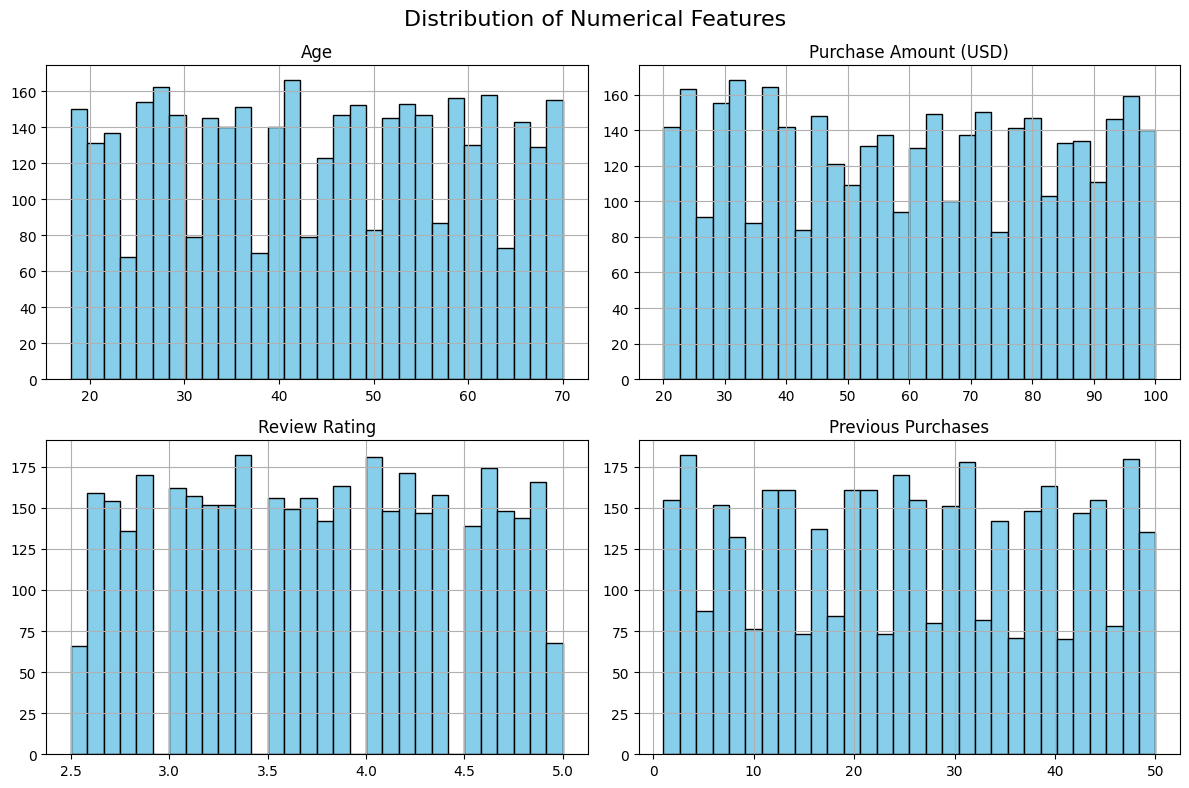

In [16]:
numerical_features = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
df[numerical_features].hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


# **📈 3. Correlations (Numerical only)**

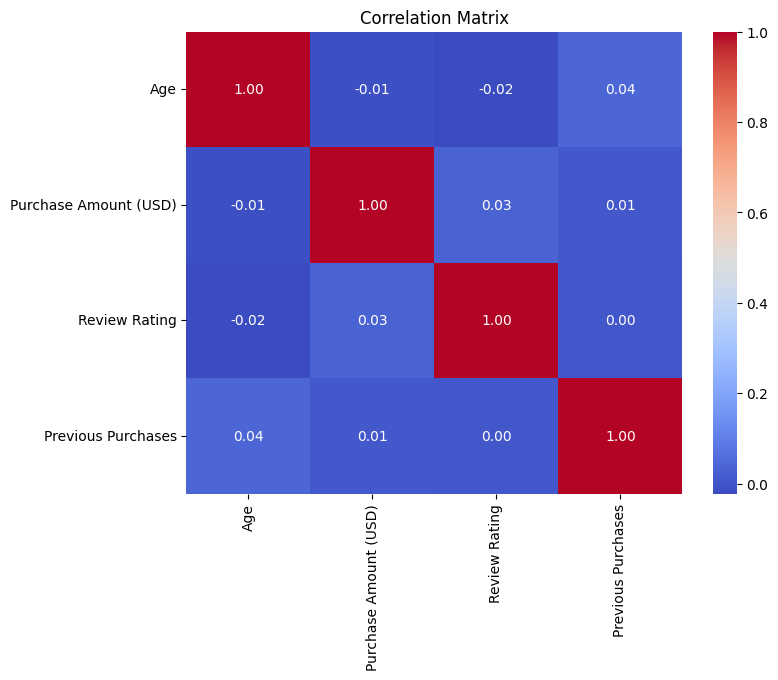

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# **🧍‍♂️ 4. Demographic Insights**

<ipython-input-18-f96e8423ca43>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')


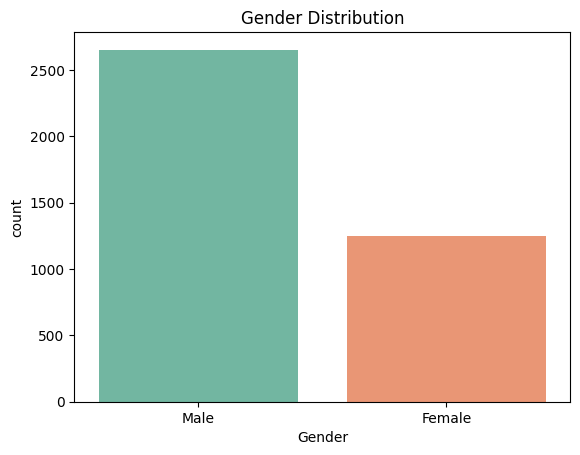

In [18]:
# Gender count
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title("Gender Distribution")
plt.show()

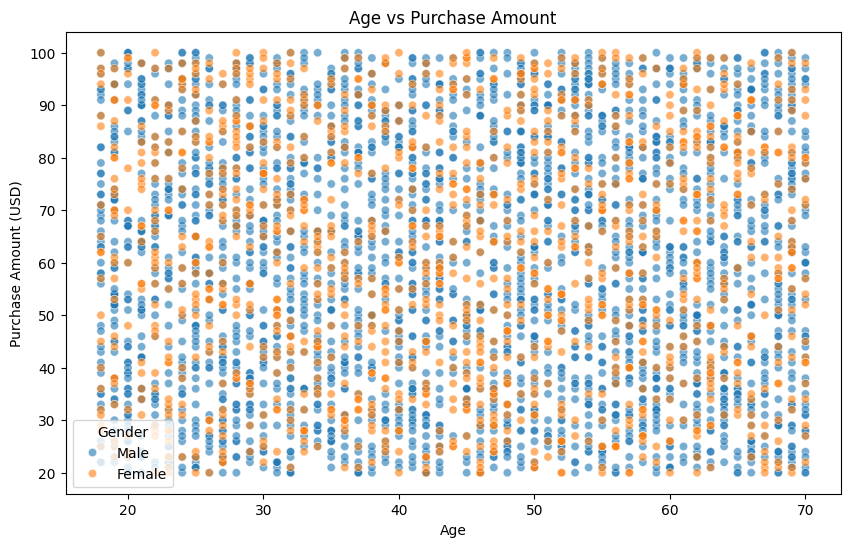

In [19]:
# Age vs Purchase
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Purchase Amount (USD)', hue='Gender', alpha=0.6)
plt.title('Age vs Purchase Amount')
plt.show()

# **🛍️ 5. Category-wise Spending Patterns**

<ipython-input-20-909511c7be2c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Purchase Amount (USD)', palette='Set3')


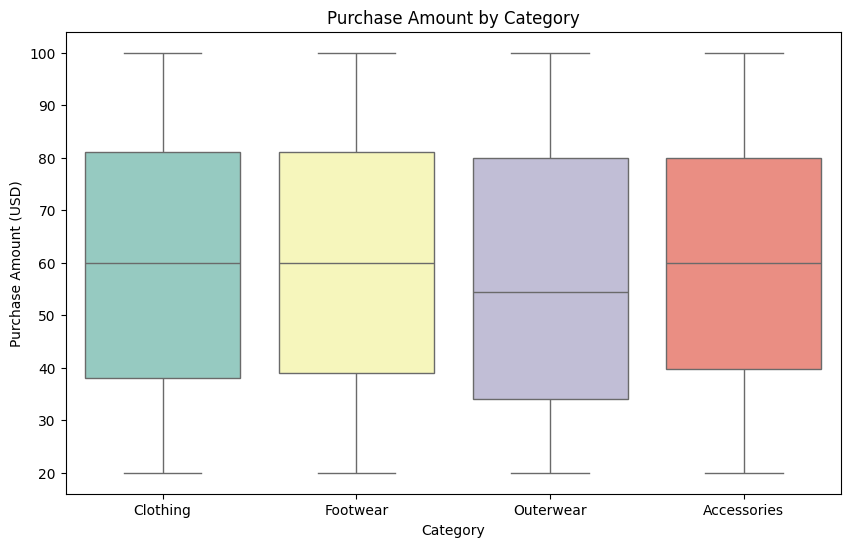

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Category', y='Purchase Amount (USD)', palette='Set3')
plt.title('Purchase Amount by Category')
plt.show()


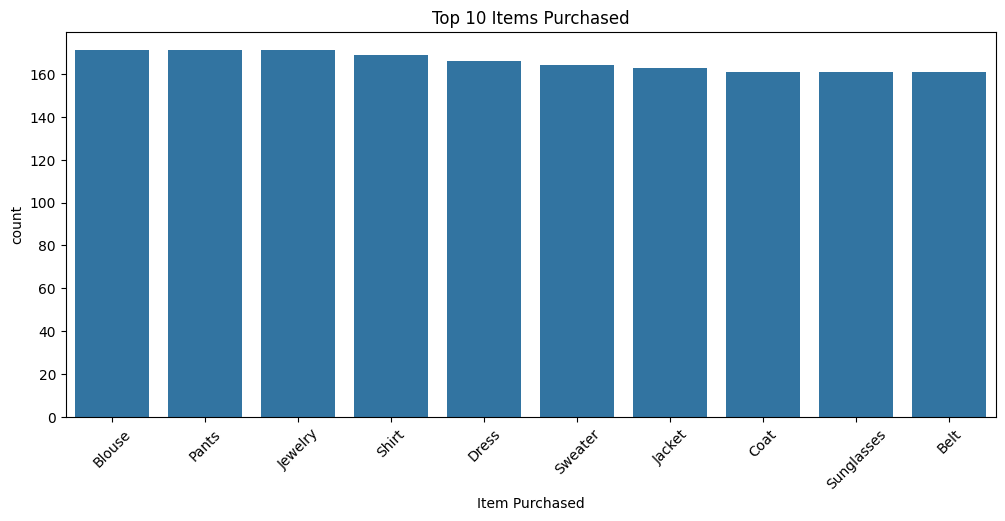

In [21]:
# Item Purchased frequency
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Item Purchased', order=df['Item Purchased'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Items Purchased")
plt.show()

# **🧭 6. Location & Season Trends**

<ipython-input-22-b6cc6e600f06>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Season', y='Purchase Amount (USD)', palette='pastel')


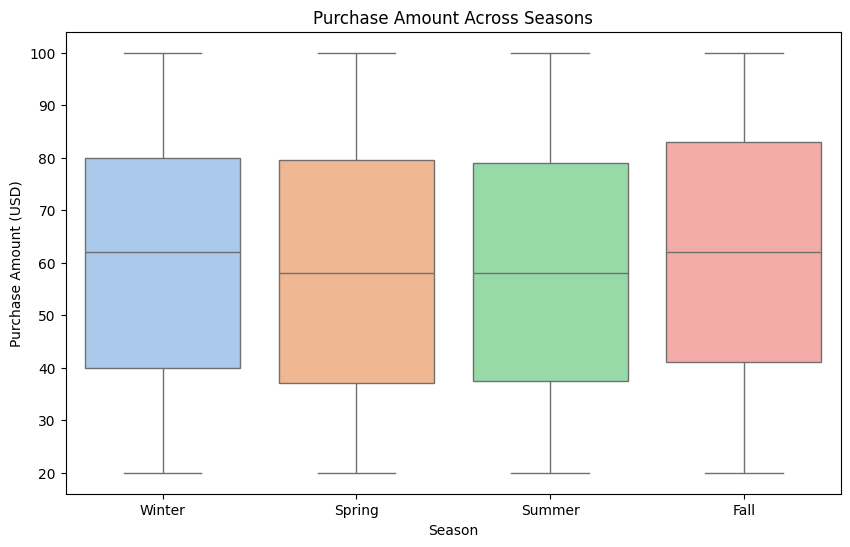

In [22]:
# Season vs Purchase Amount
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Season', y='Purchase Amount (USD)', palette='pastel')
plt.title('Purchase Amount Across Seasons')
plt.show()

<ipython-input-23-afde6883a648>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Location'].isin(top_locations)], y='Location', order=top_locations, palette='coolwarm')


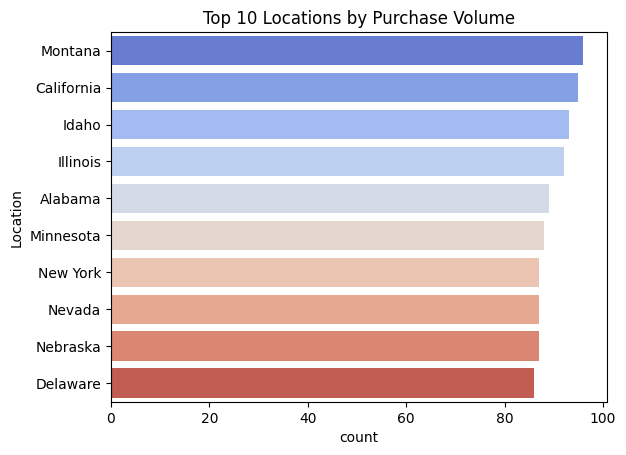

In [23]:
# Location Distribution
top_locations = df['Location'].value_counts().nlargest(10).index
sns.countplot(data=df[df['Location'].isin(top_locations)], y='Location', order=top_locations, palette='coolwarm')
plt.title('Top 10 Locations by Purchase Volume')
plt.show()

# **💳 7. Payment & Subscription Behavior**

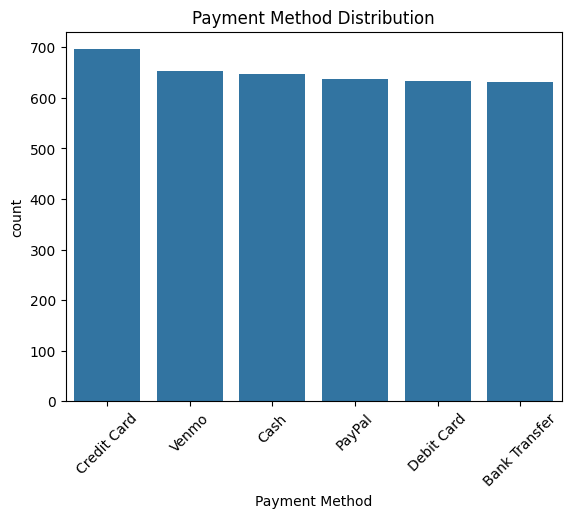

In [24]:
# Payment Method Preferences
sns.countplot(data=df, x='Payment Method', order=df['Payment Method'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Payment Method Distribution")
plt.show()

<ipython-input-25-f04e910520e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Subscription Status', y='Purchase Amount (USD)', palette='Accent')


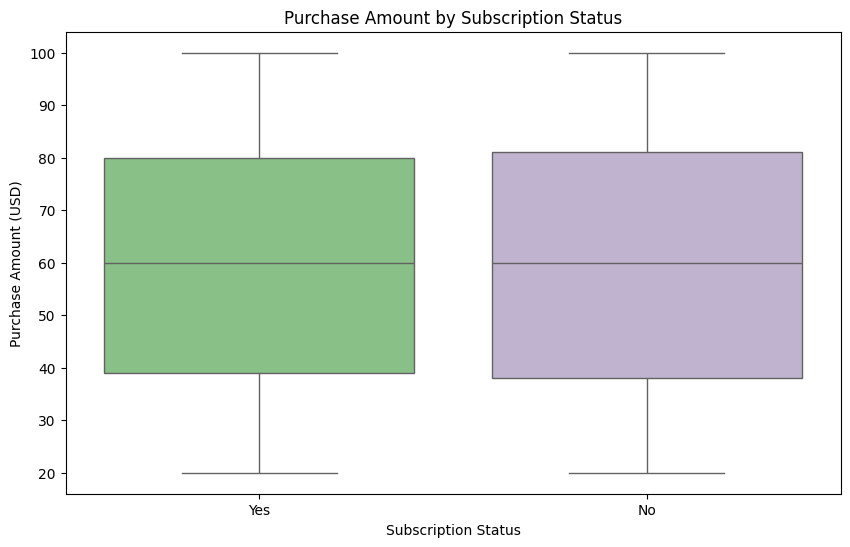

In [25]:
# Subscription vs Purchase
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Subscription Status', y='Purchase Amount (USD)', palette='Accent')
plt.title("Purchase Amount by Subscription Status")
plt.show()

# **🧾 8. Discounts and Promo Use**

<ipython-input-26-43efcea681ad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Promo Code Used', y='Purchase Amount (USD)', palette='spring')


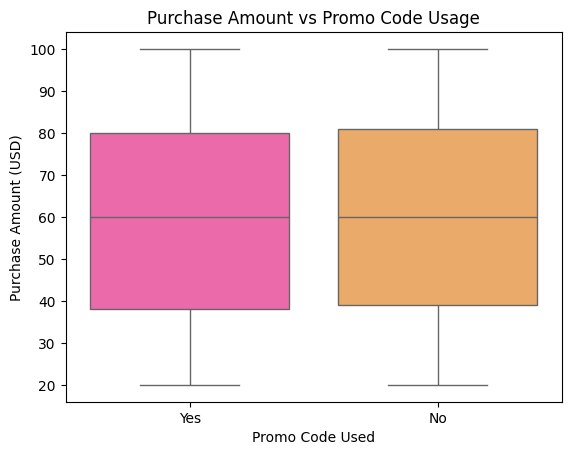

In [26]:
# Promo Code Usage Effect
sns.boxplot(data=df, x='Promo Code Used', y='Purchase Amount (USD)', palette='spring')
plt.title("Purchase Amount vs Promo Code Usage")
plt.show()

<ipython-input-27-2fcb07b0cc94>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Discount Applied', y='Previous Purchases', palette='Set2')


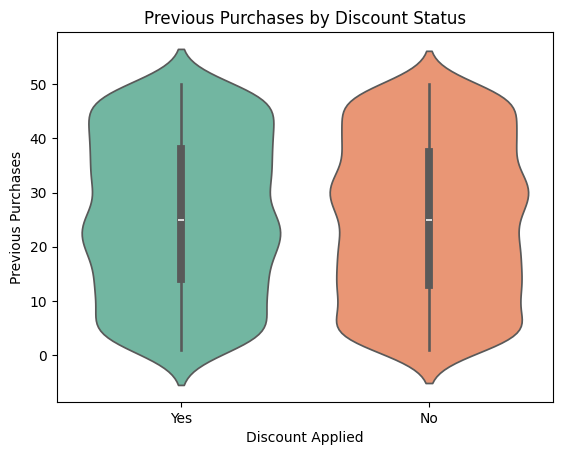

In [27]:
# Discount Applied vs Previous Purchases
sns.violinplot(data=df, x='Discount Applied', y='Previous Purchases', palette='Set2')
plt.title("Previous Purchases by Discount Status")
plt.show()

# **📅 9. Frequency Insights**

<ipython-input-28-2ba4f3636d9f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Frequency of Purchases', palette='muted')


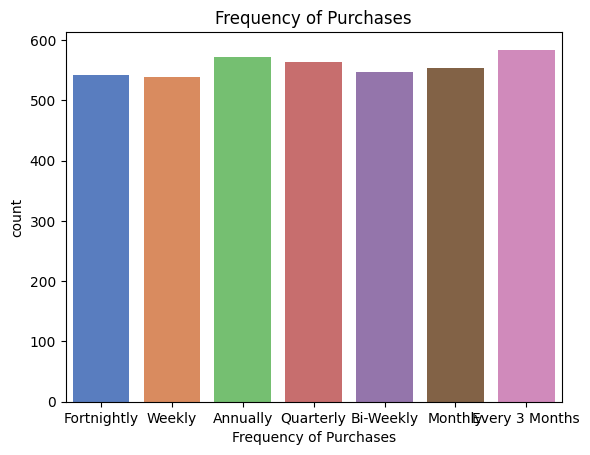

In [28]:
# Frequency of Purchase (categorical)
sns.countplot(data=df, x='Frequency of Purchases', palette='muted')
plt.title("Frequency of Purchases")
plt.show()

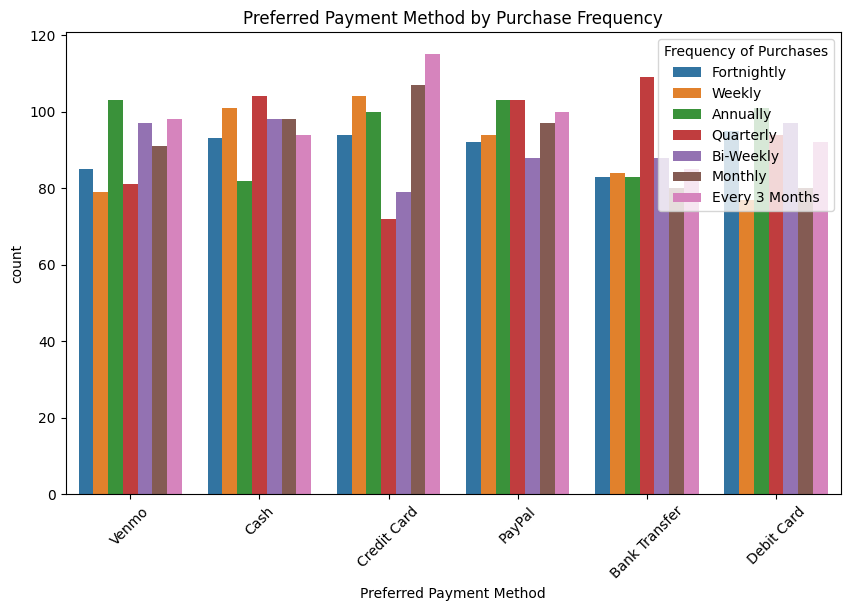

In [29]:
# Preferred Payment Method vs Frequency
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Preferred Payment Method', hue='Frequency of Purchases')
plt.xticks(rotation=45)
plt.title("Preferred Payment Method by Purchase Frequency")
plt.show()